## Logistic Regression

> Although it is called regression, it is a classification model. The naming is rather confusing since we know that regression problems are a different class than the classification problems.

In [1]:
# import load function
from tools.loaddataset import load

# import the model
from sklearn.linear_model import LogisticRegression as LR


# import the plotting library, set the plot size and theme
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)


# import the number library
import numpy as np

# import tool to plot decision boundary
from tools.dboundary import plotdb

# import the dataframe library
import pandas as pd

### The Logistic Function

# $f( x ) = \frac{c}{1+ ae^{-(x + b)}}$

The sigmoid funtion is a special case when $c=1$ and $a=1$

# $f(x) = \frac{1}{1 + e^{-(x + b)} }$


</br>
----------------------------------------------------------------------------------------------------------------------
</br>


> ### Plot for $f(t) = \frac{1}{1 + e^{-(x)}}$ , i.e when b=0

> ![](images/logisticregression/sigmoid.png)

> <div style="color:red"> What happens when $b \neq 0$? </div>

In [47]:
from IPython.display import Image
# Load interactive 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def showsigmoid(b):
    x = np.linspace(-10,10,100)
    y = 1/ ( 1 + np.exp(-x - b))
    sns.lineplot(x=x ,y=y , color="red")
    sns.scatterplot(x=0,y=np.linspace(0,1,100), color="black")
    
play = widgets.Play(
    value=0,
    min=-10,
    max=10,
    step=1,
    interval=1000,
    description="Press play",
    disabled=False
)
slider = widgets.IntSlider(min=-10, max=10, step=2, value=3)
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.HBox([play, slider])

display(play)

interact(showsigmoid, b=slider);

Play(value=0, description='Press play', interval=1000, max=10, min=-10)

interactive(children=(IntSlider(value=3, description='b', max=10, min=-10, step=2), Output()), _dom_classes=('…

### Formulation of Logistic Regression

> Let us recall the perceptron model in 2D. Just like perceptron, we want to find a vector $\vec{w}$ that can help us classify a linear decision boundary / separating hyperplace.

> Logistic regression is a linear model.

> <div style="color:red"> What are the advantages of logistic regression over perceptron? Why not just use Perceptron if LR is a linear model too? </div>

> Logistic Regression can easily deal with almost lienarly separable data where as perceptron might not be able to converge to a solution in such a case.

## $h( \vec{x}) = \frac{1}{1+ e^{-(\vec{w} \cdot \vec{x} + b)}}$

> Recall the perceptron model -  $sign( \vec{w} \cdot \vec{x} ) = sign( \; z(\vec{x}) \; )$ 

> The logistic regression is very similar if we set $b=0$

## $h(\vec{x}) = \frac{1}{1 + e^{-\vec{w} \cdot \vec{x}}} = \frac{1}{1 + e^{-z( \vec{x} )}} = f(\; z(\vec{x}) \;) = f(\vec{w} \cdot \vec{x})$


---
### What does all this mean geometrically?


> Let us compare what we had learnt in perceptron model to the logistic regression

> ![](images/logisticregression/hyperplane.png)


In [2]:
# load and plot original data
data = pd.read_csv("../dataset/coins.csv")

In [3]:
# load test and train
X_train, X_test, y_train, y_test = load(csvpath="../dataset/coins.csv")

In [4]:
# use the model
model = LR(random_state=0).fit(X_test, y_test)

# print training accuracy
model.score(X_train,y_train)

0.9565217391304348

In [5]:
# predict using the model
print("predictions:", model.predict(X_test))
print("groundtruth:",y_test.to_numpy())

# check testing accuracy
print("\nAccuracy:  ", end="")
print(model.score(X_test,y_test))

predictions: [2 1 2 1 1 2 1 2 1 2 2 2 2 1 1 1 2 2]
groundtruth: [2 1 2 1 1 2 1 2 1 2 2 2 2 1 1 1 2 2]

Accuracy:  1.0


In [6]:
def predict(reflectance,weight):
    xy = pd.DataFrame({"reflectance":[reflectance], "weight":[weight]})
    return model.predict(xy)[0]

<AxesSubplot:xlabel='reflectance', ylabel='weight'>

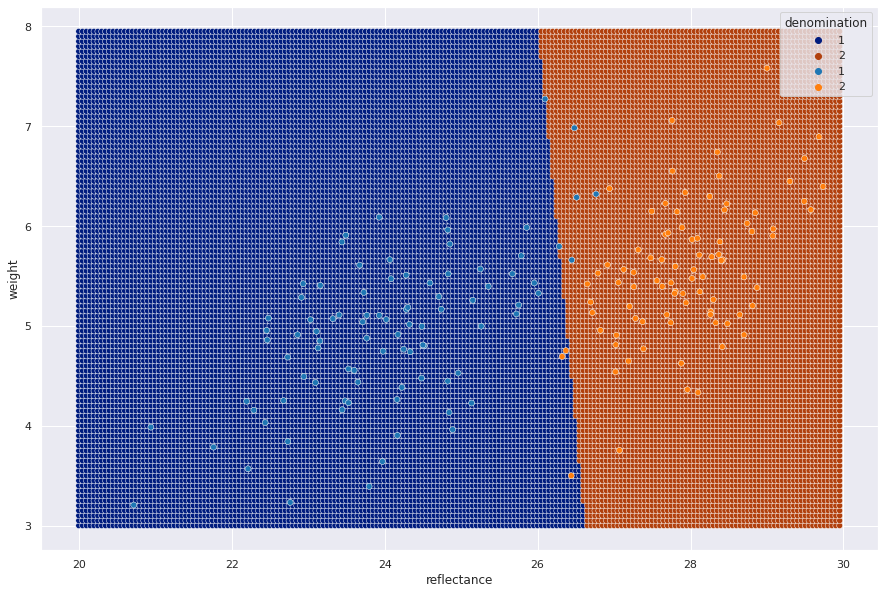

In [50]:
# plot the decision boundary
plotdb(predict)

# plot the original data
sns.scatterplot(data=data, x="reflectance", y="weight", hue="denomination", palette="tab10")